In [14]:
from matplotlib import pyplot as plt
import numpy as np
from tensorflow import keras

In [15]:
keras.__version__

'2.4.0'

In [16]:
#!wget https://bioinf.nl/~davelangers/datasets/dog_cat.zip

In [17]:
#! unzip dog_cat.zip

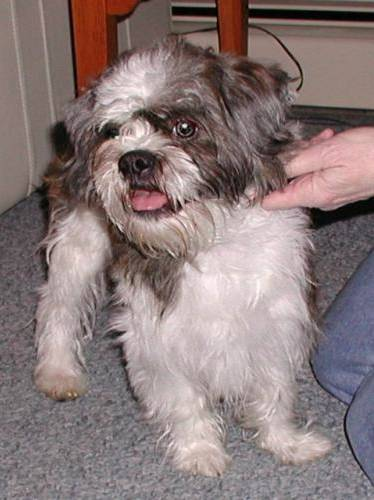

In [18]:
from IPython.display import Image
Image("dog_cat/test/dog/0002.jpg")

In [19]:
cdc = keras.models.Sequential()
# Befor input maybe reshape(need to learn squeeze data) or normalize(preprocessing)
cdc.add(keras.layers.InputLayer(input_shape=(126,126,3)))

# filters for Con2D should increased
cdc.add(keras.layers.Conv2D(filters = 32, kernel_size=(3,3),activation=keras.activations.relu))
cdc.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

cdc.add(keras.layers.Conv2D(filters = 48, kernel_size=(3,3),activation=keras.activations.relu))
cdc.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

cdc.add(keras.layers.Conv2D(filters = 64, kernel_size=(3,3),activation=keras.activations.relu))
cdc.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

cdc.add(keras.layers.Conv2D(filters = 96, kernel_size=(3,3),activation=keras.activations.relu))
cdc.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
cdc.add(keras.layers.Flatten())

cdc.add(keras.layers.Dense(units=64,activation=keras.activations.relu))

# unit 1 for predict dog or cat; unit 2 for predict dog and cat
cdc.add(keras.layers.Dense(units=1,activation=keras.activations.sigmoid))
cdc.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 124, 124, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 48)        13872     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 48)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        27712     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 96)       

In [20]:
cdc.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.RMSprop(),
    metrics=keras.metrics.BinaryAccuracy()
)

In [21]:
train_data = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
train_generator = train_data.flow_from_directory(
    directory="./dog_cat/train",
    batch_size = 20,
    color_mode = "rgb",
    target_size = (126,126),
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.


In [22]:
for x_train, y_train in train_generator:
    print(x_train.shape,x_train.dtype)
    print(y_train.shape,y_train.dtype)
    break

(20, 126, 126, 3) float32
(20,) float32


In [23]:
y_train

array([1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0.], dtype=float32)

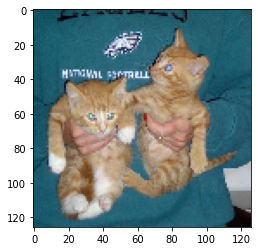

In [24]:
plt.imshow(x_train[2])

In [25]:
test_data = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_generator = test_data.flow_from_directory(
    directory="./dog_cat/test",
    batch_size = 20,
    color_mode = "rgb",
    target_size = (126,126),
    class_mode = "binary"
)

Found 500 images belonging to 2 classes.


In [26]:
result = cdc.fit_generator(
    generator = train_generator,
    epochs = 10,
    validation_data = test_generator,
    steps_per_epoch = 2000//20,
    validation_steps = 25,
)
result.history.keys()

Epoch 1/10
100/100 [==============================] - 12s 122ms/step - loss: 0.6990 - binary_accuracy: 0.5230 - val_loss: 0.6845 - val_binary_accuracy: 0.5860
Epoch 2/10
100/100 [==============================] - 11s 108ms/step - loss: 0.6820 - binary_accuracy: 0.5965 - val_loss: 0.6475 - val_binary_accuracy: 0.6080
Epoch 3/10
100/100 [==============================] - 11s 107ms/step - loss: 0.6093 - binary_accuracy: 0.6790 - val_loss: 0.5842 - val_binary_accuracy: 0.6980
Epoch 4/10
100/100 [==============================] - 11s 107ms/step - loss: 0.5621 - binary_accuracy: 0.7100 - val_loss: 0.5554 - val_binary_accuracy: 0.7140
Epoch 5/10
100/100 [==============================] - 11s 108ms/step - loss: 0.5330 - binary_accuracy: 0.7525 - val_loss: 0.5641 - val_binary_accuracy: 0.7000
Epoch 6/10
100/100 [==============================] - 11s 106ms/step - loss: 0.4854 - binary_accuracy: 0.7640 - val_loss: 0.5609 - val_binary_accuracy: 0.7380
Epoch 7/10
100/100 [==========================

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

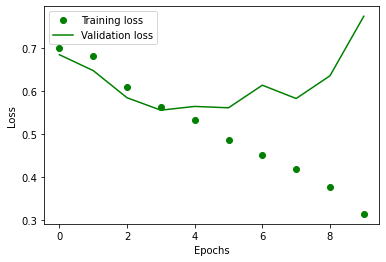

In [31]:
import matplotlib.pyplot as plt
plt.plot(result.history["loss"], 'go', label='Training loss')
plt.plot(result.history["val_loss"], 'g-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

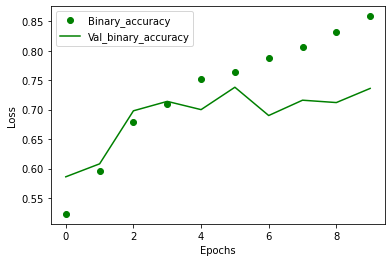

In [30]:
import matplotlib.pyplot as plt
plt.plot(result.history["binary_accuracy"], 'go', label='Binary_accuracy')
plt.plot(result.history['val_binary_accuracy'], 'g-', label='Val_binary_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [33]:
train_data = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 30,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
)
train_generator = train_data.flow_from_directory(
    directory="./dog_cat/train",
    batch_size = 20,
    color_mode = "rgb",
    target_size = (126,126),
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.


In [34]:
result = cdc.fit_generator(
    generator = train_generator,
    epochs = 30,
    validation_data = test_generator,
    steps_per_epoch = 2000//20,
    validation_steps = 25,
)
result.history.keys()

Epoch 1/30
100/100 [==============================] - 21s 212ms/step - loss: 0.5476 - binary_accuracy: 0.7270 - val_loss: 0.5126 - val_binary_accuracy: 0.7420
Epoch 2/30
100/100 [==============================] - 14s 135ms/step - loss: 0.5431 - binary_accuracy: 0.7310 - val_loss: 0.5317 - val_binary_accuracy: 0.7260
Epoch 3/30
100/100 [==============================] - 13s 135ms/step - loss: 0.5270 - binary_accuracy: 0.7425 - val_loss: 0.5036 - val_binary_accuracy: 0.7620
Epoch 4/30
100/100 [==============================] - 14s 137ms/step - loss: 0.5067 - binary_accuracy: 0.7470 - val_loss: 0.5011 - val_binary_accuracy: 0.7820
Epoch 5/30
100/100 [==============================] - 14s 139ms/step - loss: 0.5035 - binary_accuracy: 0.7645 - val_loss: 0.4921 - val_binary_accuracy: 0.7780
Epoch 6/30
100/100 [==============================] - 14s 138ms/step - loss: 0.4903 - binary_accuracy: 0.7660 - val_loss: 0.4686 - val_binary_accuracy: 0.7880
Epoch 7/30
100/100 [==========================

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

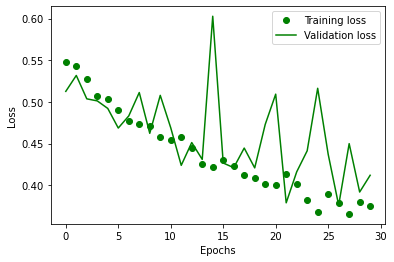

In [35]:
import matplotlib.pyplot as plt
plt.plot(result.history["loss"], 'go', label='Training loss')
plt.plot(result.history["val_loss"], 'g-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

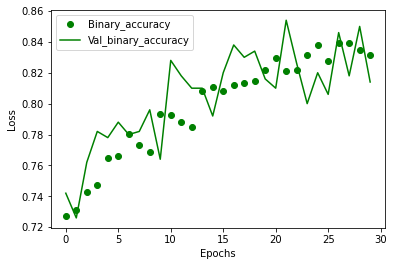

In [36]:
import matplotlib.pyplot as plt
plt.plot(result.history["binary_accuracy"], 'go', label='Binary_accuracy')
plt.plot(result.history['val_binary_accuracy'], 'g-', label='Val_binary_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()